In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
np.random.seed(233)
x = np.random.uniform(-4, 2, size = (100))
y = x ** 2 + 4 * x + 3 + 2 * np.random.randn(100)
X = x.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

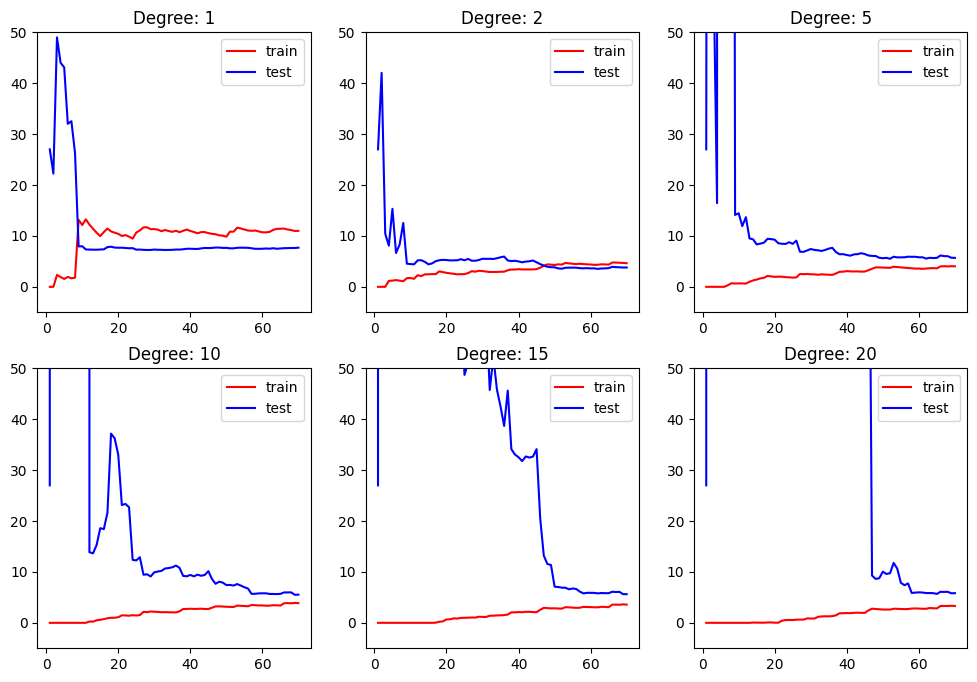

In [10]:
plt.rcParams["figure.figsize"] = (12, 8)
degrees = [1,2,5,10,15,20]
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X)

    x_train_poly = poly.transform(x_train.reshape(-1,1))
    x_test_poly = poly.transform(x_test.reshape(-1,1))
    train_error, test_error = [], []

    for k in range(len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(x_train_poly[:k+1], y_train[:k+1])
        y_pred = linear_regression.predict(x_train_poly[:k+1])
        train_mse = mean_squared_error(y_train[:k+1], y_pred)
        train_error.append(train_mse)

        y_test_pred = linear_regression.predict(x_test_poly)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_error.append(test_mse)
        plt.subplot(2, 3, i + 1)

    plt.title("Degree: {0}".format(degree))
    plt.ylim(-5, 50)
    plt.plot([k + 1 for k in range(len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k + 1 for k in range(len(x_train))], test_error, color = "blue", label = 'test')
    plt.legend()

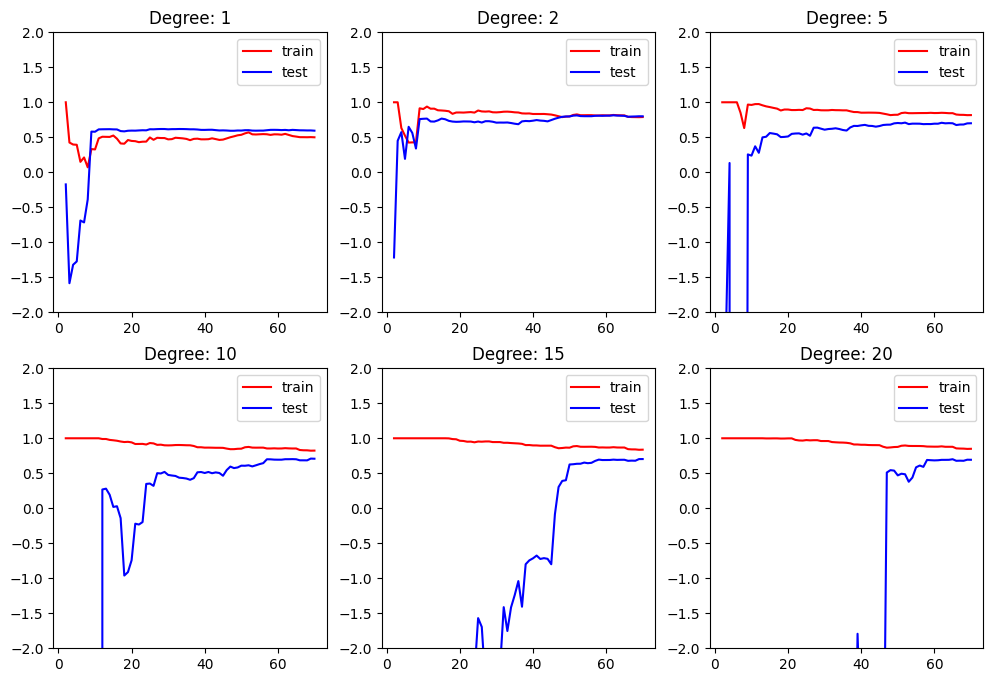

In [20]:
plt.rcParams["figure.figsize"] = (12, 8)
degrees = [1,2,5,10,15,20]
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X)

    x_train_poly = poly.transform(x_train.reshape(-1,1))
    x_test_poly = poly.transform(x_test.reshape(-1,1))
    train_error, test_error = [], []

    for k in range(1,len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(x_train_poly[:k+1], y_train[:k+1])

        train_error.append(linear_regression.score(x_train_poly[:k+1],y_train[:k+1]))
        test_error.append(linear_regression.score(x_test_poly,y_test))
        plt.subplot(2, 3, i + 1)

    plt.title("Degree: {0}".format(degree))
    plt.ylim(-5, 50)
    plt.plot([k + 1 for k in range(1,len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k + 1 for k in range(1,len(x_train))], test_error, color = "blue", label = 'test')
    plt.ylim(-2,2)
    plt.legend()

In [22]:
import os
import sys
import re
from bs4 import BeautifulSoup

def sanitize_filename(name):
    """处理文件名中的非法字符，替换为下划线"""
    name = name.strip()
    invalid_chars = r'[\/:*?"<>|]'
    return re.sub(invalid_chars, '_', name)

def get_unique_filename(directory, base_name):
    """生成不重复的文件名，若重名则添加序号"""
    counter = 1
    ext = ".html"
    new_name = f"{base_name}{ext}"
    while os.path.exists(os.path.join(directory, new_name)):
        new_name = f"{base_name}({counter}){ext}"
        counter += 1
    return new_name

def batch_rename_html_files(target_dir):
    if not os.path.isdir(target_dir):
        print(f"错误：目录 '{target_dir}' 不存在或不是有效目录")
        return

    for filename in os.listdir(target_dir):
        if not filename.lower().endswith(".html"):
            continue

        file_path = os.path.join(target_dir, filename)
        if not os.path.isfile(file_path):
            continue

        try:
            # 尝试多种编码读取文件
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    html_content = f.read()
            except UnicodeDecodeError:
                with open(file_path, 'r', encoding='gbk', errors='ignore') as f:
                    html_content = f.read()

            # 查找所有 class 为 title-small 的 div
            soup = BeautifulSoup(html_content, 'html.parser')
            title_divs = soup.find_all('div', class_='title-small')

            # 排除第一个，取剩余的第一个（即原列表的第二个元素）
            if len(title_divs) < 2:
                print(f"警告：{filename} 中 class 为 title-small 的 div 不足2个（无法排除第一个），已跳过")
                continue

            target_div = title_divs[1]  # 排除第一个后，取第一个（索引1）
            title_text = target_div.get_text(strip=True)

            if not title_text:
                print(f"警告：{filename} 中排除第一个后，目标 div.title-small 文本为空，已跳过")
                continue

            # 处理文件名并执行重命名
            sanitized_name = sanitize_filename(title_text)
            new_filename = get_unique_filename(target_dir, sanitized_name)
            new_file_path = os.path.join(target_dir, new_filename)

            os.rename(file_path, new_file_path)
            print(f"已重命名：{filename} → {new_filename}")

        except Exception as e:
            print(f"处理 {filename} 时出错：{str(e)}")

if __name__ == "__main__":
    target_directory = r"C:\Users\Yancey\Desktop\产品经理\课程"
    print(f"开始处理目录：{target_directory}（排除第一个 div.title-small）")
    batch_rename_html_files(target_directory)
    print("处理完成！")

开始处理目录：C:\Users\Yancey\Desktop\产品经理\课程（排除第一个 div.title-small）
已重命名：腾讯未来产品经理创造营【必修课-入门版】(1).html → 01 _ 发刊词：产品能力，人人必备应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(10).html → 附2：【比——产品策略模块】避坑指南应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(11).html → 09 _ 紧盯产品需求的管理目标应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(12).html → 10 _ 把握产品需求的管理节奏应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(13).html → 11 _ 产品设计之美应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(14).html → 12 _ 产品设计，少走弯路应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(15).html → 13 _ 需求落地最后一公里应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(16).html → 14 _ 数据运营应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(17).html → 15 _ 运营拉动产品增长应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(18).html → 16 _ 天下武功，唯快不破应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(19).html → 17 _ 产品风险管理应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(2).html → 02 _ 互联网产品基础——什么是产品、什么是产品经理？应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(20).html → 附3：【试——需求落地模块】避坑指南应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(21).html → 18 _ 产品经理精神篇——哪些品质，助产品经理走得更远？应学音频.html
已重命名：腾讯未来产品经理创造营【必修课-入门版】(22).html → 加餐 _ 课程主理人陈起儒：我的